# Orders

Gran parte de nuestra tarea es crear "Features", variables en los datos que representan un aspecto del fenómeno que estudiamos y nos ayudan a explicarlo.

**Ejercicio**

Vamos a investigar la relación entre orders y el score.

La idea es crear un dataframe con las siguientes features:

| feature_name 	                | type 	| description 	                                                                                                                                         |
|:------------------------------|:---:	|:------------------------------------------------------------------------------------------------------------------------------------------------------|
| `order_id` 	                  | str 	| the id of the order 	                                                                                                                                 |
| `tiempo_de_espera` 	          | float 	| numero de días entre order_date y delivered_date 	                                                                                                    |
| `tiempo_de_espera_previsto` 	 | float 	| numero de días entre order_date y estimated_delivery_date 	                                                                                           |
| `real_vas_esperado` 	         | float 	| si la fecha de entrega real es posterior a la fecha de entrega estimada, devuelve el número de días entre las dos fechas; de lo contrario, devuelve 0 |
| `order_status` 	              | str 	| statusde la orden	                                                                                                                                    |
| `es_es_cinco_estrellas` 	     | int 	| 1 si tuvo cinco estrellas en la  review, 0 caso contrario 	                                                                                           |
| `es_una_estrella` 	           | int 	| 1 si tuvo una estrella, 0 caso contrario 	                                                                                                            |
| `review_score` 	              | int 	| from 1 to 5 	                                                                                                                                         |
| `numero_de_productos` 	       | int 	| numero de productos que contiene una orden	                                                                                                           |
| `numero_de_vendedores` 	      | int 	| numero de vendedores unicos                                                                                                                           |
| `precio` 	                    | float 	| total del precio pagado por el cliente                                                                                                                |
| `valor_transporte` 	          | float 	| el valor del freight pagado por el cliente 	                                                                                                          |
| `distancia_al_cliente` 	      | float 	| distancia en km entre cliente y vendedor 	                                                                                                  |
  
Queremos filtrar las ordenes no entregadas

## Metodología:

Vamos a crear dos notebooks una de testeo y otra para importar nuestro paquete preprocess.orders_data y de ahí ir elavorando los métodos.

1er Método: Load_data: Trae el dataset sin nulos de una ubicación ya prefijada.

###  Buenas Pracitcas


Las notebooks se pueden hacer muy largas y desordenadas.
- Codifique su lógica para que siempre se pueda ejecutar de arriba a abajo sin fallar (Celda --> Ejecutar todo)
- Nombre sus variables con lo que significa y para que otra persona pueda entenderlo.
- Use nombres como `tmp` o `_` para pasos intermedios si sabe que no va a usarlos mucho tiempo
- Borre su código y combine celdas cuando sea relevante para minimizar el tamaño del Notebook (`Shift-M`)
- Oculte la salida de su celda si ya no necesita verla (haga doble clic en la sección roja `Out[]:` a la izquierda de su celda).
- Utilice la Structure de pycharm o Juypter lab para organizarse
- Shortcuts
    - `a` para insertar una celda arriba
    - `b` para insertar una celda debajo
    - `dd` para borrar una celda
    - `esc` y `flechas` para moverse entre celdas
    - `Shift-Enter` para ejecutar la celda y mover el foco a la siguiente
    - `Shift + Tab` cuando entre paréntesis de método, p. ¡`groupby()` para obtener los documentos! Repita varias veces para abrirlo permanentemente

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import olist data
from olist.load_data import load_all_data
data = load_all_data("datos/")

In [4]:
data.keys()

dict_keys(['customers', 'geolocation', 'orders', 'order_items', 'order_payments', 'order_reviews', 'products', 'sellers', 'product_category_name_translation'])

In [5]:
print(data)

{'customers':                             customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city custom

In [6]:
orders = data['orders'].copy() # buena practica para estar seguro que no modificas tu dataset original

## 1. Crear orders.py

### a) `tiempo_de_espera`
    Armar un dataframe que tenga
           order_id, tiempo_de_espera, tiempo_de_espera_previsto, real_vs_esperado, status_de_la_orden


# Pasos a seguir

> 1. Explora el dataframe `orders`
2. Filtra por `delivered orders`
3. Manipulá correctamente `datetime` (recordá el examen)
    - Repasá[`datetime`](https://docs.python.org/3/library/datetime.html)
    - Métodos para pasar "string" type a "pandas.datetime'  [`pandas.to_datetime()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
4. Crea la columna `tiempo_de_espera`
5. Crea la columna  `tiempo_de_espera_previsto`
6. Crea la columna  `real_vs_esperado`
7. Chequea el nuevo dataset
8. Una vez terminado el código pasalo a tu librería `order.py`

Tanto para `tiempo_de_espera` como para `tiempo_de_espera_previsto`, debe restar las fechas/marcas de tiempo relevantes para obtener la diferencia horaria entre los objetos `pandas.datetime`. Luego, puede usar [`datetime.timedelta()`](https://docs.python.org/3/library/datetime.html#timedelta-objects) o [`np.timedelta64()`](https ://numpy.org/doc/stable/reference/arrays.datetime.html#datetime-and-timedelta-arithmetic) para averiguar cuántos días representa esa resta.


In [7]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [8]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [9]:
# Transforma a datetime
from olist.preprocess import transformar_columnas_datetime
orders = transformar_columnas_datetime(orders, ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_estimated_delivery_date','order_delivered_customer_date'])

In [10]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [11]:
# calcula el time delta entre compra y venta

### Crear una columna
Es lo mismo utilizar .loc para asignar una columna nueva, que utilizar .assign o simplemente df['columna'] = operación

In [12]:
# Compute just the number of days in each time_delta 
import datetime
one_day_delta = datetime.timedelta(days=1) # lleva el time delta a un día
one_day_delta = np.timedelta64(24, 'h') # también se puede hacer de esta manera

# \ se puede usar para ahorrar espacio
orders.loc[:,'tiempo_de_espera'] = \
    (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']) / one_day_delta



In [13]:
(orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

0         8.0
1        13.0
2         9.0
3        13.0
4         2.0
         ... 
99436     8.0
99437    22.0
99438    24.0
99439    17.0
99440     7.0
Length: 99441, dtype: float64

In [14]:
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_de_espera
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877


In [15]:
#pasarlo a modulo
from olist.preprocess import tiempo_de_espera, tiempo_de_espera_previsto
orders = tiempo_de_espera(orders)
orders = tiempo_de_espera_previsto(orders)
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_de_espera,tiempo_de_espera_previsto
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,15.544063
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,19.137766
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,26.639711
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,26.188819
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,12.112049
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.218009,18.587442
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,23.459051
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,30.384225
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243


In [16]:
from olist.preprocess import real_vs_esperado
orders = real_vs_esperado(orders)
orders['real_vs_esperado'][orders['real_vs_esperado'] < 0] = 0
orders

C:\Users\agusd\AppData\Local\Temp\ipykernel_5096\2193274315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['real_vs_esperado'][orders['real_vs_esperado'] < 0] = 0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_de_espera,tiempo_de_espera_previsto,real_vs_esperado
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,15.544063,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,19.137766,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,26.639711,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,26.188819,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,12.112049,0.0
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.218009,18.587442,0.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,23.459051,0.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,30.384225,0.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243,0.0


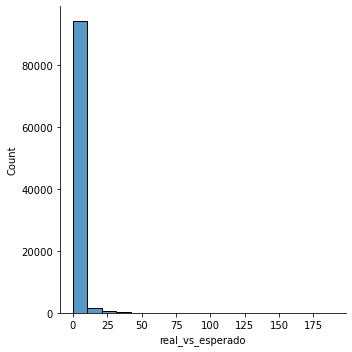

In [17]:
sns.displot(orders['real_vs_esperado'])

In [18]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_de_espera,tiempo_de_espera_previsto,real_vs_esperado
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,15.544063,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,19.137766,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,26.639711,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,26.188819,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,12.112049,0.0
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.218009,18.587442,0.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,23.459051,0.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,30.384225,0.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,37.105243,0.0


### b) `puntaje_de_compra`
     retorna un dataframe con
        order_id, es_cinco_estrellas, es_una_estrella, review_score

recordar del examen `DataFrame.apply()` o tmb se puede usar`Series.map()`


👉 We load the `reviews` for you

In [19]:
reviews = data['order_reviews'].copy()

reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [20]:
from olist.preprocess import puntaje_de_compra
reviews = puntaje_de_compra(reviews)
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,es_cinco_estrellas,es_una_estrella
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,0,0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1,0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1,0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1,0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1,0


In [21]:
reviews = reviews[['order_id', 'es_cinco_estrellas', 'es_una_estrella', 'review_score']]
reviews.head()

,order_id,es_cinco_estrellas,es_una_estrella,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5


### c) `numero_de_productos`:
     retorna un dataframe con
        order_id, numero_de_productos (numero_de_productos_por_orden)

In [22]:
from olist.preprocess import calcular_numero_productos
#fijarse que no uso solo un dataframe
productos = calcular_numero_productos(data)
productos

,order_id,numero_de_productos
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


### d) `numero_de_vendedores`:
     Retorna un dataframe con
        order_id, numero_de_vendedores (total de vendedores UNICOS !!! )

HINT!:
`pd.Series.nunique()`


In [23]:
from olist.preprocess import vendedores_unicos
vendedores = vendedores_unicos(data)
vendedores.sort_values(by = 'vendedores_unicos', ascending=False)

,order_id,vendedores_unicos
10831,1c11d0f4353b31ac3417fbfa5f0f2a8a,5
79967,cf5c8d9f52807cb2d2f0a0ff54c478da,5
53796,8c2b13adf3f377c8f2b06b04321b0925,4
55847,91be51c856a90d7efe86cf9d082d6ae3,4
11231,1d23106803c48c391366ff224513fb7f,4
...,...,...
33095,55e186387dc4b33d16d86a920ee7f77b,1
33094,55e144afb3e4115f6c520fb6242cd1bf,1
33093,55dfff244bc5d5f81d58d4148062c9b6,1
33092,55dfe839c1db3060005158c694bddb4e,1


### e) `calcular_precio_y_transporte`
     Returns a DataFrame with:
        order_id, precio, valor_transporte

recordar el agg en el groupby

In [24]:
from olist.preprocess import calcular_precio_y_transporte
precio_y_transporte = calcular_precio_y_transporte(data)
precio_y_transporte

C:\Facu\POO\clases_teorico\UCEMA_POO\07-entrenamiento\olist\preprocess.py:57: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby('order_id')['price', 'freight_value'].sum().reset_index()


,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72


### e) `distancia_al_cliente`

    Retorna un dataframe con
        order_id, distancia_al_cliente (distancia en kilometros)

usar`haversine_distance`

In [25]:
from math import radians, sin, cos, asin, sqrt

def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Computa distancia entre dos pares (lat, lng)
    Ver - (https://en.wikipedia.org/wiki/Haversine_formula)
    """
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    return 2 * 6371 * asin(sqrt(a))


In [21]:
#Tip 1:
# usar los datasets

# data['order_items']
# data['sellers']
# data['customers']


In [28]:
#tipo 2
#usar el dataset de geolocalizacion
# Un zip code puede tener varias lat y lon. groupby puede ser usado con el metodo .first() para quedarte con el primero
#agroupa data['geolocation'] con ese metodo y crea un datset llamado geo

# Solo usar columnas 'seller_id', 'seller_zip_code_prefix', 'geolocation_lat', 'geolocation_lng'

geo = data['geolocation'].copy()
geo = geo.groupby(by = 'geolocation_zip_code_prefix').first().reset_index()


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.549292,-46.633559,sao paulo,SP
1,1002,-23.548318,-46.635421,sao paulo,SP
2,1003,-23.549032,-46.635313,sao paulo,SP
3,1004,-23.550116,-46.635122,sao paulo,SP
4,1005,-23.549819,-46.635606,sao paulo,SP


In [45]:

# mergear sellers con geolocalizacion
sellers = data['sellers']
merge_sellers = sellers.merge(geo, left_on = 'seller_zip_code_prefix', right_on = 'geolocation_zip_code_prefix')[['seller_id', 'seller_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]
merge_sellers.head()
# Mergear con buyers, usar solo de ese dataset ['customer_id', 'customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']
buyers = data['customers']
merge_buyers = buyers.merge(geo, left_on = 'customer_zip_code_prefix', right_on = 'geolocation_zip_code_prefix')[['customer_id','customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]

# Mergear en otra tabla compradores y vendedores
merge_final = merge_sellers.merge(merge_buyers,how = 'left', left_on = 'seller_id', right_on = 'customer_id')
# Mergear ese resultado con geolocalizacion de compradores
merge_final

# Remover  na()

# Una orden puede tener muchos compradores retorna el promedio


,seller_id,seller_zip_code_prefix,geolocation_lat_x,geolocation_lng_x,customer_id,customer_zip_code_prefix,geolocation_lat_y,geolocation_lng_y
0,3442f8959a84dea7ee197c632cb2df15,13023,-22.898536,-47.063125,NaN,NaN,NaN,NaN
1,e0eabded302882513ced4ea3eb0c7059,13023,-22.898536,-47.063125,NaN,NaN,NaN,NaN
2,d1b65fc7debc3361ea86b5f14c68d2e2,13844,-22.382941,-46.946641,NaN,NaN,NaN,NaN
3,ce3ad9de960102d0677a81f5d0bb7b2d,20031,-22.910641,-43.176510,NaN,NaN,NaN,NaN
4,1d2732ef8321502ee8488e8bed1ab8cd,20031,-22.910641,-43.176510,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3083,f1fdf2d13186575751aa25876536d85c,5314,-23.534949,-46.733916,NaN,NaN,NaN,NaN
3084,98dddbc4601dd4443ca174359b237166,87111,-23.456431,-51.866369,NaN,NaN,NaN,NaN
3085,74871d19219c7d518d0090283e03c137,4650,-23.659845,-46.677882,NaN,NaN,NaN,NaN
3086,e603cf3fec55f8697c9059638d6c8eb5,96080,-31.744231,-52.328761,NaN,NaN,NaN,NaN


In [24]:
from olist.preprocess import calcular_distancia_vendedor_comprador
distancia_a_la_orden = calcular_distancia_vendedor_comprador(data)

In [25]:
distancia_a_la_orden

,order_id,distance_seller_customer
0,00010242fe8c5a6d1ba2dd792cb16214,301.005664
1,00018f77f2f0320c557190d7a144bdd3,589.274140
2,000229ec398224ef6ca0657da4fc703e,312.495046
3,00024acbcdf0a6daa1e931b038114c75,301.951753
4,00042b26cf59d7ce69dfabb4e55b4fd9,646.221788
...,...,...
98172,fffc94f6ce00a00581880bf54a75a037,2755.314485
98173,fffcd46ef2263f404302a634eb57f7eb,354.848852
98174,fffce4705a9662cd70adb13d4a31832d,338.827218
98175,fffe18544ffabc95dfada21779c9644f,72.870476


In [26]:
distancia_a_la_orden

,order_id,distance_seller_customer
0,00010242fe8c5a6d1ba2dd792cb16214,301.005664
1,00018f77f2f0320c557190d7a144bdd3,589.274140
2,000229ec398224ef6ca0657da4fc703e,312.495046
3,00024acbcdf0a6daa1e931b038114c75,301.951753
4,00042b26cf59d7ce69dfabb4e55b4fd9,646.221788
...,...,...
98172,fffc94f6ce00a00581880bf54a75a037,2755.314485
98173,fffcd46ef2263f404302a634eb57f7eb,354.848852
98174,fffce4705a9662cd70adb13d4a31832d,338.827218
98175,fffe18544ffabc95dfada21779c9644f,72.870476


cual es la mediana de la distancia

In [27]:
distancia_a_la_orden['distance_seller_customer'].describe()

count    98177.000000
mean       601.961534
std        596.877838
min          0.000000
25%        186.380313
50%        433.698770
75%        798.435455
max       8736.947618
Name: distance_seller_customer, dtype: float64

# Merger todos los datasets excepto el de distancia

In [28]:
tablon_primario = orders.merge(reviews, on='order_id') \
    .merge(productos, on='order_id') \
    .merge(vendedores, on='order_id') \
    .merge(precio_y_transporte, on='order_id')
tablon_primario

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_de_espera,wait_time,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,number_of_products,vendedores_unicos,precio,transporte
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,8.436574,0.0,0,0,4,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,13.782037,0.0,0,0,4,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,9.394213,0.0,1,0,5,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,13.208750,0.0,1,0,5,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,2.873877,0.0,1,0,5,1,1,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96356,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.218009,8.218009,0.0,1,0,5,1,1,72.00,13.08
96357,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,22.193727,0.0,0,0,4,1,1,174.90,20.10
96358,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,24.859421,0.0,1,0,5,1,1,205.99,65.02
96359,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,17.086424,0.0,0,0,2,2,1,359.98,81.18
